In [375]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rc('font', family='Malgun Gothic')

In [376]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
import plotly.express as px
import plotly.graph_objects as go


In [377]:
ori_df = pd.read_excel('일반대,전문대 충원율(2009~2020).xlsx')

In [378]:
ori_df

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,61,61,0,38,38,27,11,0,0,0
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,2834,2627,207,616,568,284,284,48,23,25
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,39237,34888,4349,3555,3219,1748,1471,336,163,173
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,11076,10082,994,900,828,344,484,72,23,49
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,9779,9070,709,2621,2418,1757,661,203,140,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,2020,전문대학,사립,강원,기존,한림성심대학교,1066,1483,1066,417,5820,5097,723,1317,1040,482,558,277,101,176
4718,2020,전문대학,사립,서울,기존,한양여자대학교,2521,3199,2521,678,31905,30363,1542,3052,2521,0,2521,531,5,526
4719,2020,전문대학,사립,전남,기존,한영대학교,565,818,565,253,2053,1819,234,702,565,369,196,137,86,51
4720,2020,전문대학,사립,충남,기존,혜전대학교,1128,1376,1128,248,9429,8933,496,1068,892,375,517,176,23,153


In [379]:
df = ori_df.copy()

In [380]:
df

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,61,61,0,38,38,27,11,0,0,0
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,2834,2627,207,616,568,284,284,48,23,25
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,39237,34888,4349,3555,3219,1748,1471,336,163,173
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,11076,10082,994,900,828,344,484,72,23,49
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,9779,9070,709,2621,2418,1757,661,203,140,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,2020,전문대학,사립,강원,기존,한림성심대학교,1066,1483,1066,417,5820,5097,723,1317,1040,482,558,277,101,176
4718,2020,전문대학,사립,서울,기존,한양여자대학교,2521,3199,2521,678,31905,30363,1542,3052,2521,0,2521,531,5,526
4719,2020,전문대학,사립,전남,기존,한영대학교,565,818,565,253,2053,1819,234,702,565,369,196,137,86,51
4720,2020,전문대학,사립,충남,기존,혜전대학교,1128,1376,1128,248,9429,8933,496,1068,892,375,517,176,23,153


In [381]:
df.head()

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,61,61,0,38,38,27,11,0,0,0
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,2834,2627,207,616,568,284,284,48,23,25
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,39237,34888,4349,3555,3219,1748,1471,336,163,173
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,11076,10082,994,900,828,344,484,72,23,49
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,9779,9070,709,2621,2418,1757,661,203,140,63


In [382]:
df.tail()

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1
4717,2020,전문대학,사립,강원,기존,한림성심대학교,1066,1483,1066,417,5820,5097,723,1317,1040,482,558,277,101,176
4718,2020,전문대학,사립,서울,기존,한양여자대학교,2521,3199,2521,678,31905,30363,1542,3052,2521,0,2521,531,5,526
4719,2020,전문대학,사립,전남,기존,한영대학교,565,818,565,253,2053,1819,234,702,565,369,196,137,86,51
4720,2020,전문대학,사립,충남,기존,혜전대학교,1128,1376,1128,248,9429,8933,496,1068,892,375,517,176,23,153
4721,2020,전문대학,사립,경북,기존,호산대학교,667,1011,667,344,4278,3791,487,817,611,181,430,206,38,168


In [383]:
df.columns

Index(['연도', '구분', '설립', '지역', '상태', '학교', '입학정원', '모집인원_계', '모집인원_정원내',
       '모집인원_정원외', '지원자_계', '지원자_정원내', '지원자_정원외', '입학자_계', '입학자_정원내_계',
       '입학자_정원내_남', '입학자_정원외_여', '입학자_정원외_계', '입학자_정원외_남', '입학자_정원외_여.1'],
      dtype='object')

In [384]:
# # 신입생 충원율(%) = 정원내 입학생 수 / 정원내 모집인원
# ('정원 외'는 제외됨.)

# 일단 교육부에서 말하는 신입생 충원율은 '정원 내 전형'의 충원율을 의미합니다.
# 정원 내 충원율은 '대학알리미'(www.academyinfo.go.kr)의 신입생 충원 현황 데이터에서 확인 가능합니다.
# 이는 '정원 내 입학자'를 '정원 내 모집인원'으로 나눈 값입니다.

In [385]:
# 신입생충원율(%) = '입학자_정원내_계' / '모집인원_정원내'

In [386]:
# df['real_gdp'] = df['gdpPercap'] * df['pop']

In [387]:
df['신입생충원율(%)'] = (df['입학자_정원내_계'] / df['모집인원_정원내'])*100

In [388]:
df.head()

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,신입생충원율(%)
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,...,61,0,38,38,27,11,0,0,0,100.000000
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,...,2627,207,616,568,284,284,48,23,25,84.776119
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,...,34888,4349,3555,3219,1748,1471,336,163,173,99.536178
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,...,10082,994,900,828,344,484,72,23,49,98.337292
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,...,9070,709,2621,2418,1757,661,203,140,63,100.000000


In [389]:
df

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,신입생충원율(%)
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,...,61,0,38,38,27,11,0,0,0,100.000000
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,...,2627,207,616,568,284,284,48,23,25,84.776119
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,...,34888,4349,3555,3219,1748,1471,336,163,173,99.536178
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,...,10082,994,900,828,344,484,72,23,49,98.337292
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,...,9070,709,2621,2418,1757,661,203,140,63,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,2020,전문대학,사립,강원,기존,한림성심대학교,1066,1483,1066,417,...,5097,723,1317,1040,482,558,277,101,176,97.560976
4718,2020,전문대학,사립,서울,기존,한양여자대학교,2521,3199,2521,678,...,30363,1542,3052,2521,0,2521,531,5,526,100.000000
4719,2020,전문대학,사립,전남,기존,한영대학교,565,818,565,253,...,1819,234,702,565,369,196,137,86,51,100.000000
4720,2020,전문대학,사립,충남,기존,혜전대학교,1128,1376,1128,248,...,8933,496,1068,892,375,517,176,23,153,79.078014


In [390]:
# df.rename(columns={"설립구분":"연도별","지역":"학교","상태":"설립구분","학교":"지역","입학정원":"상태","모집인원_계":"학교명"}, inplace=True)

In [391]:
df

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,신입생충원율(%)
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,...,61,0,38,38,27,11,0,0,0,100.000000
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,...,2627,207,616,568,284,284,48,23,25,84.776119
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,...,34888,4349,3555,3219,1748,1471,336,163,173,99.536178
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,...,10082,994,900,828,344,484,72,23,49,98.337292
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,...,9070,709,2621,2418,1757,661,203,140,63,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4717,2020,전문대학,사립,강원,기존,한림성심대학교,1066,1483,1066,417,...,5097,723,1317,1040,482,558,277,101,176,97.560976
4718,2020,전문대학,사립,서울,기존,한양여자대학교,2521,3199,2521,678,...,30363,1542,3052,2521,0,2521,531,5,526,100.000000
4719,2020,전문대학,사립,전남,기존,한영대학교,565,818,565,253,...,1819,234,702,565,369,196,137,86,51,100.000000
4720,2020,전문대학,사립,충남,기존,혜전대학교,1128,1376,1128,248,...,8933,496,1068,892,375,517,176,23,153,79.078014


In [392]:
# # 노선번호별 승차에 대한 평균
# sub['승차'].groupby(sub['노선번호']).mean()
# 출처: https://data-make.tistory.com/139 [Data Makes Our Future]

In [393]:
df_1=df.groupby(df['지역']).sum()

In [394]:
df_1

,연도,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,신입생충원율(%)
지역,,,,,,,,,,,,,,,,
강원,584212,290629,333245,290930,42315,1592162,1486535,105627,305255,276932,159015,117917,28323,15998,12325,27482.816847
경기,1684089,1151571,1492570,1154482,338088,13537065,12849086,687979,1331689,1145694,570191,575503,185995,94592,91403,80932.716480
경남,553993,301429,356625,301461,55164,1742079,1627992,114087,321016,291526,167154,124372,29490,15508,13982,26434.637750
경북,916550,518212,612293,518542,93751,2778747,2586306,192441,546008,489656,261557,228099,56352,27171,29181,41861.119240
광주,433123,262256,312069,262552,49517,1420671,1307475,113196,292658,259539,128708,130831,33119,15273,17846,21189.219506
대구,338433,312815,395413,313117,82296,2452344,2264997,187347,358723,308274,157907,150367,50449,25659,24790,16328.335579
대전,410958,334327,378923,334954,43969,2212936,2090359,122577,361023,330886,178868,152018,30137,15218,14919,19739.387640
부산,602330,562298,667760,561669,106091,4069049,3805083,263966,610040,551499,283404,268095,58541,29752,28789,29059.469954
서울,1311426,1072656,1299170,1075532,223638,16463933,15613584,850349,1240661,1071181,469807,601374,169480,71344,98136,64516.325083


In [395]:
df_1 = df_1.reset_index()

In [396]:
df_1['신입생충원율(%)']

0     27482.816847
1     80932.716480
2     26434.637750
3     41861.119240
4     21189.219506
5     16328.335579
6     19739.387640
7     29059.469954
8     64516.325083
9      4012.707073
10     5981.857160
11    12077.156350
12    22418.740844
13    23675.227880
14     4576.153965
15    29797.348739
16    21048.762676
Name: 신입생충원율(%), dtype: float64

In [397]:
df_1['신입생충원율(%)'] = (df_1['입학자_정원내_계'] / df_1['모집인원_정원내'])*100

In [398]:
# 0으로 나온다는 얘기.
# inf  (a.k.a. infinity)
# 어떤 값이며, 다른 어떤 값보다도 큰 값
# -inf 값은 +inf와는 반대로 어떤 값보다도 작은 값
# nan (a.k.a. Not A Number)
# 이 변수에 할당된 값은 숫자가 아님
# 그러므로 0도 아니며, 어떠한 수학적 연산을 할 수 없음
# https://shydev.tistory.com/8

In [399]:
df['신입생충원율(%)'].groupby(df['연도별']).mean()

KeyError: '연도별'

In [400]:
df_1['신입생충원율(%)']

0     95.188533
1     99.238793
2     96.704383
3     94.429381
4     98.852418
5     98.453294
6     98.785505
7     98.189325
8     99.595456
9     97.864859
10    99.633122
11    99.721241
12    93.492650
13    95.096142
14    88.853446
15    97.936227
16    97.421534
Name: 신입생충원율(%), dtype: float64

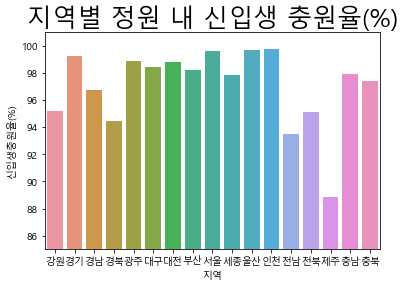

In [401]:
ax=sns.barplot(
    data = df_1,
    x= "지역",
    y= "신입생충원율(%)",
    
)
ax.set_ylim(85,101)
plt.xticks(fontsize =10) 
plt.yticks(fontsize =10)
plt.title('지역별 정원 내 신입생 충원율(%)', color = "#000000", size = 25)
plt.show()

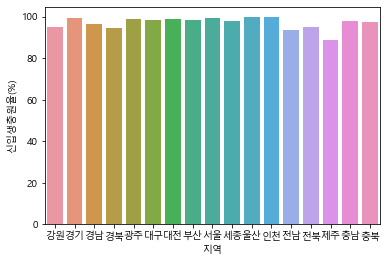

In [402]:
sns.barplot(
    data = df_1,
    x= "지역",
    y= "신입생충원율(%)",
)

plt.show()

In [403]:
print(df)

        연도    구분  설립  지역  상태            학교  입학정원  모집인원_계  모집인원_정원내  모집인원_정원외  \
0     2009   대학교  사립  경북  기존         가야대학교    36      38        38         0   
1     2009   대학교  사립  경남  기존  가야대학교 _제2캠퍼스   664     727       670        57   
2     2009   대학교  사립  경기  기존         가천대학교  3157    3612      3234       378   
3     2009   대학교  사립  인천  기존      가천의과학대학교   827     917       842        75   
4     2009   대학교  사립  강원  기존      가톨릭관동대학교  2418    2682      2418       264   
...    ...   ...  ..  ..  ..           ...   ...     ...       ...       ...   
4717  2020  전문대학  사립  강원  기존       한림성심대학교  1066    1483      1066       417   
4718  2020  전문대학  사립  서울  기존       한양여자대학교  2521    3199      2521       678   
4719  2020  전문대학  사립  전남  기존         한영대학교   565     818       565       253   
4720  2020  전문대학  사립  충남  기존         혜전대학교  1128    1376      1128       248   
4721  2020  전문대학  사립  경북  기존         호산대학교   667    1011       667       344   

      ...  지원자_정원내  지원자_정원외  입학자_계  입학자

In [404]:
df['신입생충원율(%)'].quantile(.25)

98.38688687007776

In [405]:
df['신입생충원율(%)'].quantile(.75)

100.0

In [406]:
ori_df = pd.read_excel('일반대,전문대 충원율(2009~2020).xlsx')

In [407]:
df1 = ori_df.copy()

In [408]:
df1.columns

Index(['연도', '구분', '설립', '지역', '상태', '학교', '입학정원', '모집인원_계', '모집인원_정원내',
       '모집인원_정원외', '지원자_계', '지원자_정원내', '지원자_정원외', '입학자_계', '입학자_정원내_계',
       '입학자_정원내_남', '입학자_정원외_여', '입학자_정원외_계', '입학자_정원외_남', '입학자_정원외_여.1'],
      dtype='object')

In [409]:
df1['지역']

0       경북
1       경남
2       경기
3       인천
4       강원
        ..
4717    강원
4718    서울
4719    전남
4720    충남
4721    경북
Name: 지역, Length: 4722, dtype: object

In [410]:
df1['충원률'] = df1['입학자_정원내_계']/df1['모집인원_정원내']

In [411]:
df1['충원률'].quantile(.1)

0.8878646275842538

In [412]:
df1['충원률'].min()

0.0

(array([   8.,   15.,   34.,   45.,   43.,   63.,  122.,  374., 4004.,
           8.]),
 array([0.        , 0.11698974, 0.23397948, 0.35096921, 0.46795895,
        0.58494869, 0.70193843, 0.81892816, 0.9359179 , 1.05290764,
        1.16989738]),
 <BarContainer object of 10 artists>)

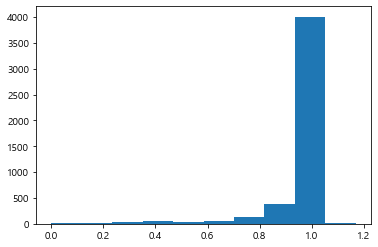

In [413]:
plt.hist(df1['충원률'])

In [414]:
df1['구분']

0        대학교
1        대학교
2        대학교
3        대학교
4        대학교
        ... 
4717    전문대학
4718    전문대학
4719    전문대학
4720    전문대학
4721    전문대학
Name: 구분, Length: 4722, dtype: object

In [415]:
df_uni = df1.loc[df1['구분']=='대학교',:]

In [416]:
df_uni

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률
0,2009,대학교,사립,경북,기존,가야대학교,36,38,38,0,...,61,0,38,38,27,11,0,0,0,1.000000
1,2009,대학교,사립,경남,기존,가야대학교 _제2캠퍼스,664,727,670,57,...,2627,207,616,568,284,284,48,23,25,0.847761
2,2009,대학교,사립,경기,기존,가천대학교,3157,3612,3234,378,...,34888,4349,3555,3219,1748,1471,336,163,173,0.995362
3,2009,대학교,사립,인천,기존,가천의과학대학교,827,917,842,75,...,10082,994,900,828,344,484,72,23,49,0.983373
4,2009,대학교,사립,강원,기존,가톨릭관동대학교,2418,2682,2418,264,...,9070,709,2621,2418,1757,661,203,140,63,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,2020,대학교,사립,광주,기존,호남대학교,1562,1714,1564,150,...,10625,496,1703,1560,806,754,143,71,72,0.997442
2695,2020,대학교,사립,광주,기존,호남신학대학교,139,139,139,0,...,215,0,139,139,67,72,0,0,0,1.000000
2696,2020,대학교,사립,충남,기존,호서대학교,2881,3209,2890,319,...,21610,1055,3155,2887,1612,1275,268,150,118,0.998962
2697,2020,대학교,사립,서울,기존,홍익대학교,2371,2879,2394,485,...,33746,2396,2876,2393,1236,1157,483,179,304,0.999582


In [417]:
df_uni['충원률'] = df_uni['입학자_정원내_계']/df_uni['모집인원_정원내']

<ipython-input-417-373fa7a38876>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uni['충원률'] = df_uni['입학자_정원내_계']/df_uni['모집인원_정원내']


(array([   9.,   12.,   37.,   28.,   33.,   35.,   42.,  109., 2270.,
           4.]),
 array([0.04      , 0.15298974, 0.26597948, 0.37896921, 0.49195895,
        0.60494869, 0.71793843, 0.83092816, 0.9439179 , 1.05690764,
        1.16989738]),
 <BarContainer object of 10 artists>)

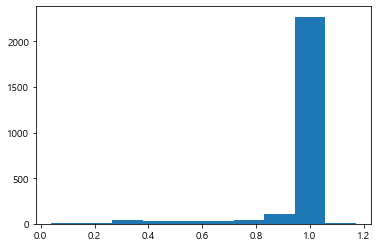

In [418]:
plt.hist(df_uni['충원률'])

In [419]:
df1['충원률'] = df1['입학자_정원내_계']/df1['모집인원_정원내']

In [420]:
(df1['충원률']>1).sum()

170

In [421]:
(df1['충원률']==1).sum()

1611

In [422]:
(df1['충원률']<0.8).sum()

294

In [423]:
df_short = df1.loc[df1['충원률']<0.8,:]

In [424]:
df_short

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률
8,2009,대학교,사립,서울,기존,가톨릭대학교 _제3캠퍼스,80,91,80,11,...,110,5,53,48,35,13,5,2,3,0.600000
17,2009,대학교,사립,경북,기존,건동대학교,390,424,390,34,...,460,27,121,119,105,14,2,2,0,0.305128
26,2009,대학교,사립,대구,기존,경북외국어대학교,150,166,150,16,...,376,3,98,98,46,52,0,0,0,0.653333
42,2009,대학교,사립,광주,기존,광신대학교,160,165,160,5,...,103,0,72,69,31,38,3,2,1,0.431250
44,2009,대학교,사립,전남,기존,광주가톨릭대학교,45,45,45,0,...,25,0,24,24,22,2,0,0,0,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,2020,전문대학,사립,경기,기존,웅지세무대학교,599,831,599,232,...,930,35,272,268,158,110,4,3,1,0.447412
4674,2020,전문대학,사립,경남,기존,창원문성대학교,1218,1467,1218,249,...,5743,500,989,883,509,374,106,33,73,0.724959
4709,2020,전문대학,사립,대구,기존,한국폴리텍 VI 대학 영남융합기술캠퍼스,175,210,175,35,...,281,9,120,114,65,49,6,3,3,0.651429
4715,2020,전문대학,사립,경기,기존,한국폴리텍 특성화대학 반도체융합캠퍼스,330,818,780,38,...,322,53,359,322,279,43,37,27,10,0.412821


In [425]:
df_full = df1.loc[df1['충원률']>1,:]

In [426]:
df_full['num'] = 1

<ipython-input-426-79a55467271f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['num'] = 1


In [427]:
df_full_num1 = df_full.groupby(['지역','연도']).sum()

In [428]:
df_full_num1

입학정원  모집인원_계  모집인원_정원내  모집인원_정원외  지원자_계  지원자_정원내  지원자_정원외  입학자_계  \
지역 연도                                                                       
강원 2009   252     252       210        42    407      390       17    222   
   2010  1840    2081      1848       233  11142    10386      756   2078   
   2011  1895    2075      1905       170  12245    11587      658   2073   
   2012   852     912       836        76   4178     3991      187    895   
   2013   475     506       472        34   3036     2822      214    507   
...       ...     ...       ...       ...    ...      ...      ...    ...   
충남 2015   900    1049       900       149   9882     9547      335    998   
   2016   180     209       180        29    164      141       23    219   
   2017  1628    1757      1642       115  21278    19793     1485   1754   
   2019  2053    2376      2057       319  13129    12242      887   2372   
   2020  3632    4129      3638       491  33227    30892     2335   4122   

         입학자_정원내_계  입학자_정원내_남  입학자_정원외_여  입학자_정원외_계  입학자_정원외_남  입학자_정원외_여.1  \
지역 연도                                                                         
강원 2009        214        191         23          8          7            1   
   2010       1849        926        923        229        119          110   
   2011       1926       1323        603        147         97           50   
   2012        848        549        299         47         29           18   
   2013        473         80        393         34         10           24   
...            ...        ...        ...        ...        ...          ...   
충남 2015        901        662        239         97         80           17   
   2016        190        112         78         29         20            9   
   2017       1646        952        694        108         66           42   
   2019       2059       1206        853        313        143          170   
   2020       3640       2139       1501        482        231          251   

              충원률  num  
지역 연도                   
강원 2009  1.019048    1  
   2010  1.000541    1  
   2011  2.022622    2  
   2012  1.014354    1  
   2013  1.002119    1  
...           ...  ...  
충남 2015  1.001111    1  
   2016  1.055556    1  
   2017  1.002436    1  
   2019  1.000972    1  
   2020  2.001119    2  

[84 rows x 16 columns]

In [429]:
df_full_num1 = df_full_num1.reset_index()

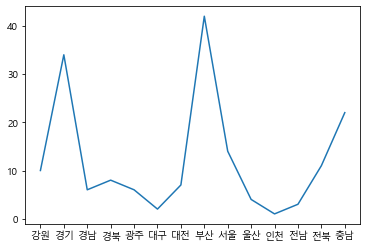

In [430]:
plt.plot(df_full_num['지역'],df_full_num['num'])

In [431]:
df_full_num1

,지역,연도,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률,num
0,강원,2009,252,252,210,42,407,390,17,222,214,191,23,8,7,1,1.019048,1
1,강원,2010,1840,2081,1848,233,11142,10386,756,2078,1849,926,923,229,119,110,1.000541,1
2,강원,2011,1895,2075,1905,170,12245,11587,658,2073,1926,1323,603,147,97,50,2.022622,2
3,강원,2012,852,912,836,76,4178,3991,187,895,848,549,299,47,29,18,1.014354,1
4,강원,2013,475,506,472,34,3036,2822,214,507,473,80,393,34,10,24,1.002119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,충남,2015,900,1049,900,149,9882,9547,335,998,901,662,239,97,80,17,1.001111,1
80,충남,2016,180,209,180,29,164,141,23,219,190,112,78,29,20,9,1.055556,1
81,충남,2017,1628,1757,1642,115,21278,19793,1485,1754,1646,952,694,108,66,42,1.002436,1
82,충남,2019,2053,2376,2057,319,13129,12242,887,2372,2059,1206,853,313,143,170,1.000972,1


In [432]:
df_full_num2 = df1.loc[df1['충원률'] == 1,:]

In [433]:
df_full_num2['num'] = 1

<ipython-input-433-dc36caf3dea4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_num2['num'] = 1


In [434]:
df_full_num2 = df_full_num2.groupby(['지역','연도']).sum()

In [435]:
df_full_num2 = df_full_num2.reset_index()

In [436]:
df_full_num2

,지역,연도,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률,num
0,강원,2009,2448,2718,2448,270,9898,9165,733,2657,2448,1786,662,209,146,63,2.0,2
1,강원,2010,4386,5445,4386,1059,18408,16812,1596,5008,4386,2889,1497,622,414,208,5.0,5
2,강원,2011,5634,6750,5639,1111,40077,36458,3619,6413,5639,3250,2389,774,463,311,6.0,6
3,강원,2012,3304,4145,3300,845,16924,15287,1637,3818,3300,1917,1383,518,327,191,6.0,6
4,강원,2013,4214,5162,4214,948,19547,18163,1384,4813,4214,2532,1682,599,369,230,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,충북,2016,2095,2543,2097,446,12385,11812,573,2351,2097,1406,691,254,128,126,4.0,4
189,충북,2017,1501,1838,1502,336,11029,10518,511,1733,1502,719,783,231,53,178,3.0,3
190,충북,2018,1501,1841,1502,339,11276,10759,517,1702,1502,781,721,200,50,150,3.0,3
191,충북,2019,4423,5529,4426,1103,34219,32614,1605,5002,4426,2604,1822,576,271,305,5.0,5


In [437]:
df_full_num2 = df_full_num2.groupby(['연도']).sum()
df_full_num2 = df_full_num2.reset_index()
df_full_num2

,연도,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률,num
0,2009,91968,125937,92019,33918,717424,679720,37704,108514,92019,47736,44283,16495,8584,7911,84.0,84
1,2010,162672,213397,162700,50697,1412977,1329660,83317,189944,162700,84501,78199,27244,14264,12980,128.0,128
2,2011,200768,260038,200902,59136,1922073,1814662,107411,234161,200902,102056,98846,33259,17511,15748,160.0,160
3,2012,171892,225516,171890,53626,1749325,1649853,99472,203042,171890,88279,83611,31152,16622,14530,139.0,139
4,2013,177088,230014,177270,52744,1578705,1489588,89117,206203,177270,89525,87745,28933,14123,14810,146.0,146
5,2014,140467,187749,140467,47282,1332752,1252938,79814,166863,140467,71167,69300,26396,12737,13659,123.0,123
6,2015,161464,215855,161192,54663,1549964,1459391,90573,190594,161192,80014,81178,29402,13833,15569,150.0,150
7,2016,162426,218846,162307,56539,1565058,1469840,95218,193153,162307,80330,81977,30846,14425,16421,153.0,153
8,2017,123488,169890,123506,46384,1224885,1147328,77557,149273,123506,59364,64142,25767,11851,13916,125.0,125
9,2018,130232,173830,130211,43619,1293916,1206289,87627,157275,130211,62014,68197,27064,12515,14549,131.0,131


Text(0.5, 1.0, '연도별 전국 충원율 1')

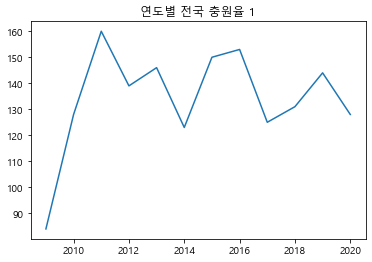

In [438]:
plt.plot(df_full_num2['연도'],df_full_num2['num'])
plt.title("연도별 전국 충원율 1")

<ipython-input-439-7ad050113db6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_num3['num'] = 1


Text(0.5, 1.0, '연도별 전국 충원율 1 미만')

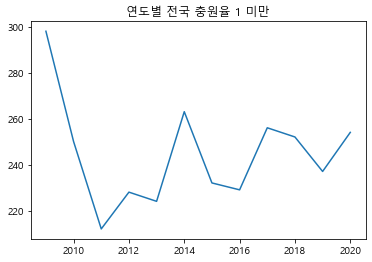

In [439]:
df_full_num3 = df1.loc[df1['충원률'] < 1,:]
df_full_num3['num'] = 1
df_full_num3 = df_full_num3.groupby(['연도']).sum()
df_full_num3 = df_full_num3.reset_index()
plt.plot(df_full_num3['연도'],df_full_num3['num'])
plt.title("연도별 전국 충원율 1 미만")

<ipython-input-440-98de3b334a93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_num4['num'] = 1


Text(0.5, 1.0, '연도별 전국 충원율 0.8 미만')

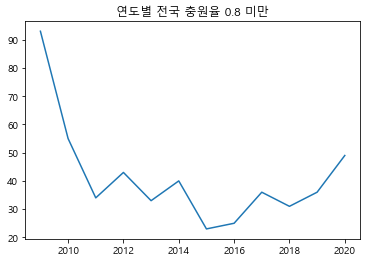

In [440]:
df_full_num4 = df1.loc[df1['충원률'] < 0.9,:]
df_full_num4['num'] = 1
df_full_num4 = df_full_num4.groupby(['연도']).sum()
df_full_num4 = df_full_num4.reset_index()
plt.plot(df_full_num4['연도'],df_full_num4['num'])
plt.title("연도별 전국 충원율 0.8 미만")

<ipython-input-441-170196402c8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_num4['num'] = 1


Text(0.5, 1.0, '연도별 전국 충원율 0.8 미만')

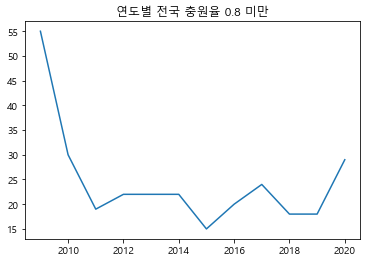

In [441]:
df_full_num4 = df1.loc[df1['충원률'] < 0.8,:]
df_full_num4['num'] = 1
df_full_num4 = df_full_num4.groupby(['연도']).sum()
df_full_num4 = df_full_num4.reset_index()
plt.plot(df_full_num4['연도'],df_full_num4['num'])
plt.title("연도별 전국 충원율 0.8 미만")

In [442]:

df_full_num4 = df1.loc[df1['충원률'] < 0.8,:]

In [443]:
df_full_num4

,연도,구분,설립,지역,상태,학교,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,...,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률
8,2009,대학교,사립,서울,기존,가톨릭대학교 _제3캠퍼스,80,91,80,11,...,110,5,53,48,35,13,5,2,3,0.600000
17,2009,대학교,사립,경북,기존,건동대학교,390,424,390,34,...,460,27,121,119,105,14,2,2,0,0.305128
26,2009,대학교,사립,대구,기존,경북외국어대학교,150,166,150,16,...,376,3,98,98,46,52,0,0,0,0.653333
42,2009,대학교,사립,광주,기존,광신대학교,160,165,160,5,...,103,0,72,69,31,38,3,2,1,0.431250
44,2009,대학교,사립,전남,기존,광주가톨릭대학교,45,45,45,0,...,25,0,24,24,22,2,0,0,0,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,2020,전문대학,사립,경기,기존,웅지세무대학교,599,831,599,232,...,930,35,272,268,158,110,4,3,1,0.447412
4674,2020,전문대학,사립,경남,기존,창원문성대학교,1218,1467,1218,249,...,5743,500,989,883,509,374,106,33,73,0.724959
4709,2020,전문대학,사립,대구,기존,한국폴리텍 VI 대학 영남융합기술캠퍼스,175,210,175,35,...,281,9,120,114,65,49,6,3,3,0.651429
4715,2020,전문대학,사립,경기,기존,한국폴리텍 특성화대학 반도체융합캠퍼스,330,818,780,38,...,322,53,359,322,279,43,37,27,10,0.412821


In [444]:
df_full_num1.to_excel('중간점검.xlsx')

PermissionError: [Errno 13] Permission denied: '중간점검.xlsx'

In [445]:
df_full_num1.loc[df_full_num1['연도']>=2019,:]

,지역,연도,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률,num
20,경남,2019,2088,2267,2081,186,10138,9485,653,2221,2082,1186,896,139,89,50,1.000481,1
31,대구,2020,220,220,220,0,3466,3466,0,231,231,167,64,0,0,0,1.050000,1
38,대전,2019,147,160,147,13,2286,2131,155,161,148,52,96,13,6,7,1.006803,1
49,부산,2019,2435,2735,2432,303,17162,16434,728,2587,2437,1200,1237,150,67,83,1.002056,1
50,부산,2020,1813,2032,1817,215,8886,8433,453,1954,1818,846,972,136,59,77,1.000550,1
58,서울,2019,1345,1507,1348,159,18015,16966,1049,1484,1351,598,753,133,60,73,2.009897,2
62,울산,2019,360,399,360,39,3834,3600,234,384,366,265,101,18,12,6,1.016667,1
66,전남,2020,914,963,913,50,4611,4381,230,947,914,564,350,33,23,10,1.001095,1
82,충남,2019,2053,2376,2057,319,13129,12242,887,2372,2059,1206,853,313,143,170,1.000972,1
83,충남,2020,3632,4129,3638,491,33227,30892,2335,4122,3640,2139,1501,482,231,251,2.001119,2


In [446]:
df_full_year = df_full.groupby(['연도']).sum()

In [447]:
df_full_year

,입학정원,모집인원_계,모집인원_정원내,모집인원_정원외,지원자_계,지원자_정원내,지원자_정원외,입학자_계,입학자_정원내_계,입학자_정원내_남,입학자_정원외_여,입학자_정원외_계,입학자_정원외_남,입학자_정원외_여.1,충원률,num
연도,,,,,,,,,,,,,,,,
2009,21860,24052,21699,2353,201367,188176,13191,24272,22023,11320,10703,2249,1164,1085,17.375316,17
2010,31952,36907,31842,5065,288592,267222,21370,35622,32040,15277,16763,3582,1614,1968,20.219220,20
2011,47145,52125,46898,5227,417886,390804,27082,51791,47194,25245,21949,4597,2664,1933,29.353101,29
2012,46959,53141,46850,6291,506097,476378,29719,52027,46981,24657,22324,5046,2556,2490,26.128413,26
2013,35664,40507,35594,4913,318370,302260,16110,39112,35663,18769,16894,3449,1880,1569,20.115053,20
2014,10983,12461,10983,1478,110855,105396,5459,11988,11003,5544,5459,985,521,464,8.035558,8
2015,11928,12981,11725,1256,86971,82994,3977,12625,11806,6515,5291,819,488,331,11.150814,11
2016,12200,13516,11935,1581,118715,113873,4842,13210,12000,7065,4935,1210,802,408,10.144944,10
2017,19004,20971,18745,2226,198115,187956,10159,20675,18808,10139,8669,1867,972,895,12.079391,12


Text(0.5, 1.0, '연도별 전국 충원율 1 초과')

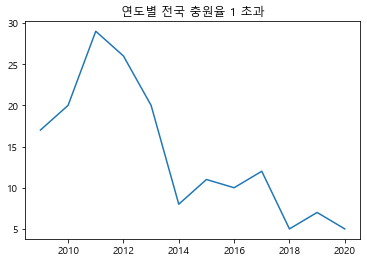

In [448]:
plt.plot(df_full_year.index, df_full_year['num'])
plt.title("연도별 전국 충원율 1 초과")
#연도별 전국 충원율 

>1 (과달) 끝
==1 (충원) !
<1 (미달) !
<0.8 (위험) !

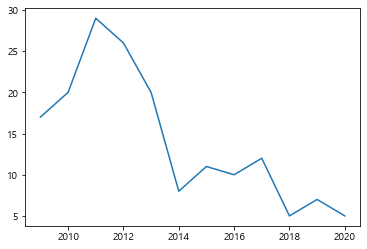

In [449]:
plt.plot(df_full_year.index, df_full_year['num'])